In [13]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

### Popular Architecture Models

- VGG(Visual Geometry Group) -> VGG16, VGG19
- ResNet(Residual Network) -> ResNet50, ResNet101
- Inceptionnet -> v1,v2,v3(latest)


In [14]:
from keras.applications.vgg16 import VGG16



In [15]:
#model = VGG16(weights= 'imagenet',include_top=True) #here weight is trained in imagenet dataset

# CNN as feature extractor and then use classifier
# DL myth  which extract feature itself is this thing only
# In transfer learning the feature extractor layer is freezed means in bp weight shouldn't be updated
# So classifier can be trained in less image\
# Fine Tuning : if data if of different domain like eg in DeepMind
# Using pillow library
# data augumentation , shearing especially 
# softmax = for classifier

### Different Variation
- data similarity
- freeze CNN layers or not?

Data is of similar domain
- we can only train the classifier network

Data is drastically different
- we can just use pre-trained weights for weight initialization and train everything


When to Freeze CNN layers
- if data is similar, we can choose to freeze CNN layers and only train the classifier network
- we can only freeze few layers ( few initial layers) and train rest of the networks


### Strategy
- C1 -> conv + relu
- C2 -> conv + relu + maxpool

- C1 ->c1 ->c1 ->C2 ->c2 -> c1
- c2 ->c1 ->c2 ->c2 ->...
...
...
- Infinite possibilities


In [16]:
model = VGG16(weights='vgg16-with-top.h5',include_top=True)
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

## Load Data

In [17]:
from keras.preprocessing.image import ImageDataGenerator

In [18]:
TRAIN_DIR ='train' 
VAL_DIR = 'val'
TEST_DIR = ''

In [19]:
datagen = ImageDataGenerator(rescale=1.0/2.55)
#every pixel from 0 to 1 array size

In [20]:
WIDTH,HEIGHT = 224,224

In [21]:
train_generator = datagen.flow_from_directory(
TRAIN_DIR,
target_size = (WIDTH,HEIGHT),
batch_size = 32,
class_mode = 'categorical')

Found 8000 images belonging to 2 classes.


In [22]:
val_generator = datagen.flow_from_directory(
VAL_DIR,
target_size = (WIDTH,HEIGHT),
batch_size = 32,
class_mode = 'categorical')

Found 2000 images belonging to 2 classes.


In [23]:
files= train_generator.filenames
files[:5],print


(['cat/cat.1.jpg',
  'cat/cat.10.jpg',
  'cat/cat.100.jpg',
  'cat/cat.1000.jpg',
  'cat/cat.1001.jpg'],
 <function print>)

In [24]:
import random
from keras.preprocessing.image import load_img


dog/dog.2050.jpg
train/dog/dog.2050.jpg


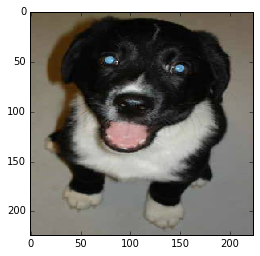

In [25]:
randomfile = random.choice(files)
print(randomfile)
randomfile = TRAIN_DIR + '/'+randomfile
print(randomfile)
img = load_img(randomfile,target_size=(WIDTH,HEIGHT))
plt.imshow(img)

In [26]:
img = np.array(img)
img = np.expand_dims(img,axis=0)
#img = np.array([img])
print(img.shape)

(1, 224, 224, 3)


In [27]:
prediction =model.predict(img)

In [28]:
label = np.argmax(prediction)

In [29]:
label

232

# import json

In [30]:
# with open()

In [31]:
# label_to_name(str(label))

# Fine Tuning Pre-Trained Model
We train classifier network and freeze CNN layers



In [32]:
model_1= VGG16(weights ='vgg16-no-top.h5',include_top = False,
             input_shape = (WIDTH,HEIGHT,3))


In [33]:
model_1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [34]:
from keras.layers import Flatten,Activation,Dense
from keras.models import Model,Sequential # sequential is also inherited from this model only

### Create our own prediction model
- freeze some(or all) CNN layers
- add classifier netwoks(ANN/Dense layers)

In [35]:
# predictions = model_1.output
# predictions = Flatten()(predictions) #calling prediction on flatten objects
# predictions = Dense(50)(predictions)
# predictions = Dense(2,activation='softmax')(predictions)
# ourmodel = Model(input=model_1.output,output=predictions)

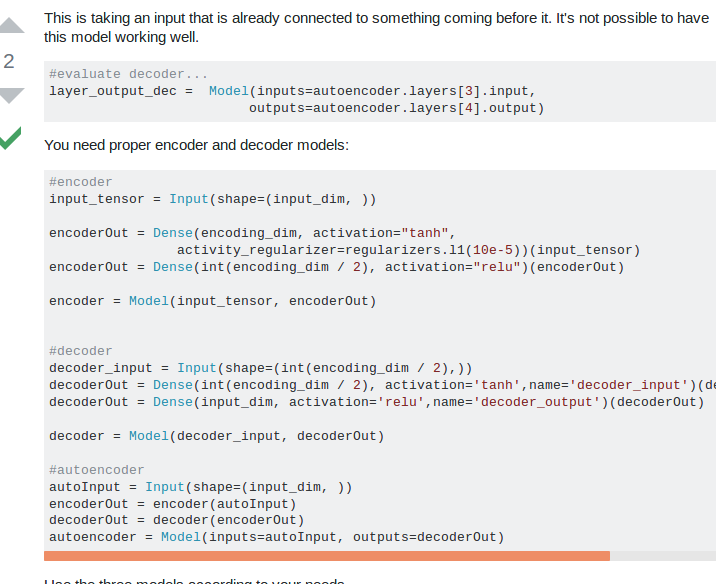

In [36]:
ourmodel = Sequential()
ourmodel.add(model_1)
ourmodel.add(Flatten())
ourmodel.add(Dense(2,activation='softmax'))


In [37]:
# ourmodel.layers[0].trainable = False
# ourmodel.layers[1].trainable = False
# trainable model freeze means false

In [38]:
for layer in ourmodel.layers[:19]:
    layer.trainable = False

In [39]:
from keras.optimizers import RMSprop


In [40]:
opt = RMSprop(lr=0.01)

In [44]:
ourmodel.compile(
loss = 'categorical_crossentropy',optimizer = opt,
metrics = ["accuracy"])

In [45]:
TRAIN_STEPS = train_generator.samples/train_generator.batch_size
VAL_STEPS = val_generator.samples/val_generator.batch_size
TRAIN_STEPS,VAL_STEPS

(250.0, 62.5)

In [47]:
ourmodel.fit_generator(
train_generator,
epochs = 1,
steps_per_epoch= TRAIN_STEPS,
validation_data = val_generator,
validation_steps = VAL_STEPS,
verbose=1
)

Epoch 1/1
250/250 [==============================] - 2355s 9s/step - loss: 4.9043 - acc: 0.4467 - val_loss: 4.6057 - val_acc: 0.4690


### Scenario
#####  3 Conv Layers
- filter size =(3,3)
- widely used -> deep layers with smaller filters


#### 1 conv layer

- filter Size=(7,7)

- use small filter size and add non-linearities
- high resolution : add big filter at first

### Assumption
K ->3*3
S ->1
P ->0
Max Pool ->Absent
Number of filter = C
Number of input channel = C

***Case 1***
(C *3*3 *C)*3--> 27C^2

** Case 2**
(C * 7*7*C)*1 -> 49 C^2



# Summary
- transfer learning strategy
    - vgg16
    - fine tuning
- loading pre-trained model with classifier network(top)
    -prdiction
- loading pre-trained model without classifier network(no top)
- adding our own layers to pre-trained
- training on our own dataset(fine tuning)

# TO Do
- archite of REsnet and Inception Network
- Hyperparameter Tunning and Image Augumentation

# Image Augumentation
- imaaug

In [ ]:
# neural style transfer
# YOLO V3(download DarkNet)
# MaskRCNN

In [49]:
prediction =ourmodel.predict(img)

In [50]:
label = np.argmax(prediction)

In [51]:
label

0

In [52]:
train_generator.class_indices

{'cat': 0, 'dog': 1}